# Khám phá dữ liệu qua các câu hỏi và câu trả lời


In [8]:
# import những thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Đọc dữ liệu đã tiền xử lý ở phần trước
df = pd.read_csv('../data/cleaned_dataset.csv')
df.sample(5)

,Khu vực tuyển,Thời gian thử việc,Cấp bậc,Yêu cầu giới tính,Số lượng tuyển,Hình thức làm việc,Yêu cầu bằng cấp,Yêu cầu kinh nghiệm,Ngành nghề,Quy mô công ty,Loại công ty,Mức lương tối thiểu,Mức lương tối đa,Mức lương trung bình,Tuổi thấp nhất,Tuổi cao nhất,Tuổi trung bình
3037,Hà Nội,2.0,Chuyên viên- nhân viên,Nữ,2,Toàn thời gian cố định,Đại học,1 năm,Bán hàng - Kinh doanh/Dược phẩm/Chăm sóc khách...,Trên 300 người,2,8.0,20.0,14.0,19.8,38.2,29.0
2659,TP.HCM,1.8,Chuyên viên- nhân viên,Không yêu cầu,5,Toàn thời gian cố định,Cao đẳng,Dưới 1 năm,Marketing/Thực tập sinh,Dưới 10 người,1,2.0,3.0,2.5,22.4,33.8,28.1
4451,Hà Nội,2.0,Chuyên viên- nhân viên,Nữ,1,Toàn thời gian cố định,Cao đẳng,Dưới 1 năm,Quản lý tiêu chuẩn và chất lượng/Khoa học - Kỹ...,Trên 300 người,2,7.0,9.0,8.0,26.2,46.0,36.1
936,Bình Dương,2.0,Chuyên viên- nhân viên,Không yêu cầu,2,Toàn thời gian cố định,Không,1 năm,Kiến trúc - Thiết kế nội ngoại thất,Dưới 10 người,1,10.0,15.0,12.5,22.6,37.0,29.8
3068,"Cần Thơ, Cà Mau, Bình Thuận, Đắk Lắk, Long An",2.0,Chuyên viên- nhân viên,Không yêu cầu,15,Toàn thời gian cố định,Trung cấp,Dưới 1 năm,Bán hàng - Kinh doanh/Y tế - Chăm sóc sức khỏe...,10 - 150 người,2,8.0,25.0,16.5,22.0,35.0,28.5


## 1. Khám phá dữ liệu

- Các ngành nghề đăng tin tuyển dụng là các ngành nào?

In [10]:
carreer = pd.Series(df['Ngành nghề'].str.split('/').explode().str.strip())
num_carreer = carreer.nunique()
print('Số ngành nghề: ', num_carreer)
carreer_value = pd.DataFrame(carreer.value_counts())
carreer_value.reset_index(inplace=True)
carreer_value.columns = ['Ngành nghề', 'Số lượng']
carreer_value

Số ngành nghề:  53


,Ngành nghề,Số lượng
0,Bán hàng - Kinh doanh,1812
1,Chăm sóc khách hàng,754
2,Kế toán,708
3,Bán sỉ - Bán lẻ - Quản lý cửa hàng,686
4,Hành chính - Thư ký,610
5,Marketing,562
6,Khoa học - Kỹ thuật,469
7,Xây dựng,417
8,Tài chính - Đầu tư - Chứng Khoán,374
9,Kiểm toán,334


- Xét 10 ngành nghề có số lượng công việc tuyển cao nhất

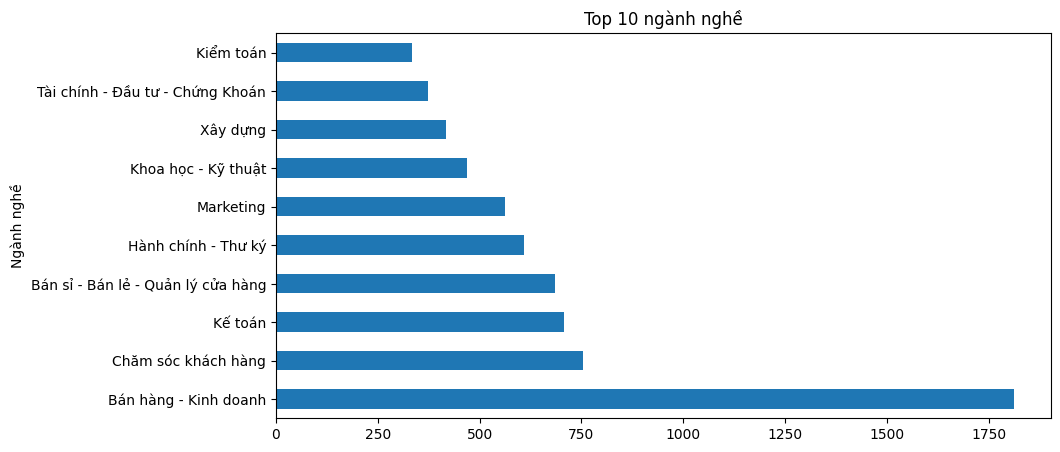

In [11]:
top10_carreer = carreer.value_counts().head(10)
top10_carreer.plot(kind='barh', figsize=(10, 5), title='Top 10 ngành nghề');

- Các công việc này sẽ có yêu cầu bằng cấp như thế nào?

In [12]:
degree_requirements = pd.DataFrame(df['Yêu cầu bằng cấp'].value_counts())
degree_requirements.reset_index(inplace=True)
degree_requirements.columns = ['Yêu cầu bằng cấp', 'Số lượng']
degree_requirements

,Yêu cầu bằng cấp,Số lượng
0,Cao đẳng,1817
1,Đại học,1057
2,Trung cấp,957
3,Không,628
4,Trung học,536
5,Chứng chỉ,64
6,Trên đại học,5


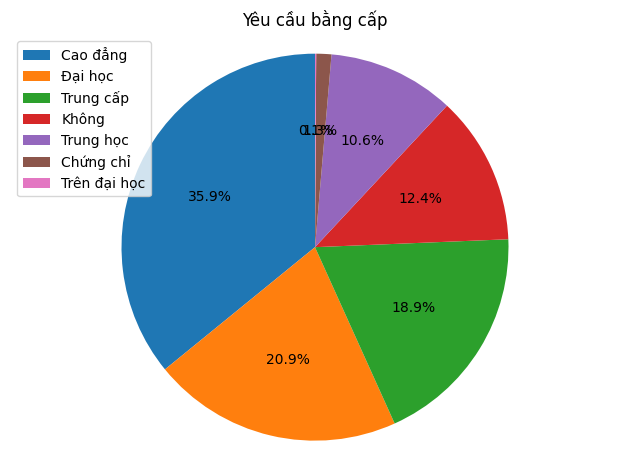

In [21]:
labels = degree_requirements['Yêu cầu bằng cấp']
sizes = degree_requirements['Số lượng']
plt.pie(sizes, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Yêu cầu bằng cấp')
plt.tight_layout()
plt.legend(labels, loc='best')
plt.show()

- Các công việc này có yêu cầu về kinh nghiệm làm việc không?

In [13]:
exp_requirements = pd.DataFrame(df['Yêu cầu kinh nghiệm'].value_counts())
exp_requirements.reset_index(inplace=True)
exp_requirements.columns = ['Yêu cầu kinh nghiệm', 'Số lượng']
exp_requirements

,Yêu cầu kinh nghiệm,Số lượng
0,1 năm,1741
1,Chưa có kinh nghiệm,1114
2,2 năm,881
3,Dưới 1 năm,739
4,3 năm,413
5,5 năm,106
6,Hơn 5 năm,44
7,4 năm,26


- Các cấp bậc tuyển là các cấp bậc nào?

In [14]:
level_df = pd.DataFrame(df['Cấp bậc'].value_counts())
level_df.reset_index(inplace=True)
level_df.columns = ['Cấp bậc', 'Số lượng']
level_df

,Cấp bậc,Số lượng
0,Chuyên viên- nhân viên,4318
1,Quản lý nhóm- giám sát,296
2,Quản lý cấp trung,245
3,Cộng tác viên,139
4,Quản lý cấp cao,42
5,Chuyên gia,23
6,Chưa cập nhật,1


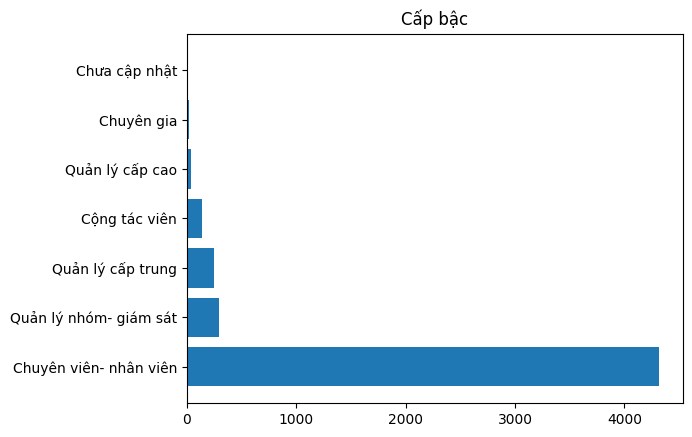

In [25]:
labels = level_df['Cấp bậc']
sizes = level_df['Số lượng']
plt.barh(labels, sizes)
plt.title('Cấp bậc')
plt.show()

- Yêu cầu về giới tính của các công việc

In [27]:
gender_df = pd.DataFrame(df['Yêu cầu giới tính'].value_counts())
gender_df.reset_index(inplace=True)
gender_df.columns = ['Giới tính', 'Số lượng']
gender_df

,Giới tính,Số lượng
0,Không yêu cầu,3296
1,Nam,1097
2,Nữ,671


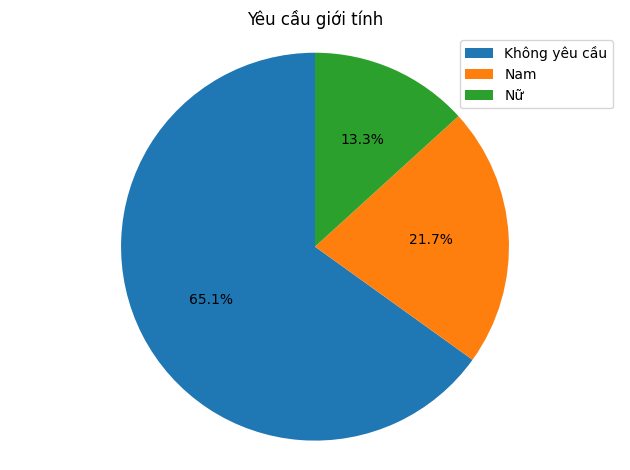

In [28]:
labels = gender_df['Giới tính']
sizes = gender_df['Số lượng']
plt.pie(sizes, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Yêu cầu giới tính')
plt.tight_layout()
plt.legend(labels, loc='best')
plt.show()

- Độ tuổi trung bình tuyển nhân sự của các công việc 

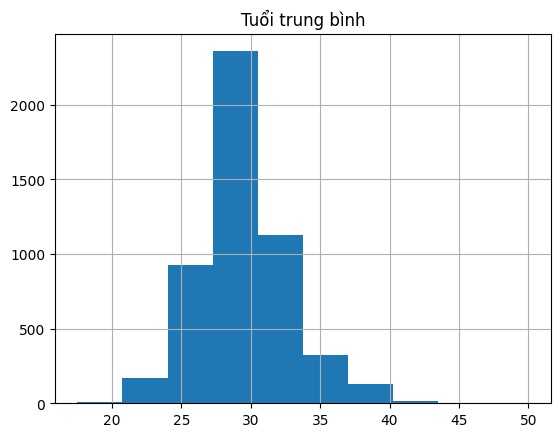

In [29]:
avg_age_df = pd.DataFrame(df['Tuổi trung bình'])
avg_age_df.hist(bins=10)
plt.title('Tuổi trung bình')
plt.show()

In [30]:
area_df = pd.Series(df['Khu vực tuyển']).str.split(',').explode().str.strip()
area_df = pd.DataFrame(area_df.value_counts())
area_df.reset_index(inplace=True)
area_df.columns = ['Khu vực', 'Số lượng']
area_df

,Khu vực,Số lượng
0,TP.HCM,2500
1,Hà Nội,1355
2,Bình Dương,402
3,Đồng Nai,173
4,Long An,157
...,...,...
59,Yên Bái,4
60,Hà Giang,3
61,Nước ngoài,2
62,Bắc Kạn,1


- Xét 10 khu vực có số lượng công việc tuyển nhiều nhất

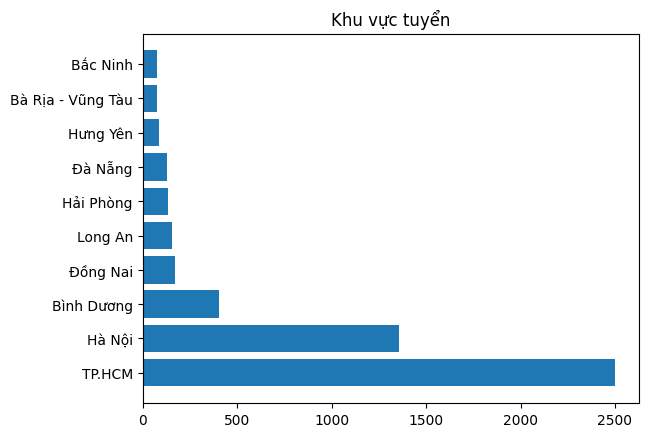

In [33]:
labels = area_df['Khu vực'].head(10)
sizes = area_df['Số lượng'].head(10)
plt.barh(labels, sizes)
plt.title('Khu vực tuyển')
plt.show()

## 2. Đặt câu hỏi và trả lời